In [28]:
%run globals
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
# produce matlab-style plots
import matplotlib as mpl
import pickle
import os
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# increase font size on plots
mpl.rc('font',**{'size':12})
mpl.rcParams.update(mpl.rcParamsDefault)

## unpack feedback controllers

each B has 11 participants and 8 stimulated frequencies

In [29]:
# load EMG 1st order feedback controllers
f = open("LNP_FB_1st.pickle","rb")
B_fo_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 1st order feedback controllers
f = open("LNP_FB_1st_man.pickle","rb")
B_fo_man = pickle.load(f,encoding='latin1')
f.close()

# load EMG 2nd order feedback controllers
f = open("LNP_FB_2nd_emg.pickle","rb")
B_so_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 2nd order feedback controllers
f = open("LNP_FB_2nd_man.pickle","rb")
B_so_man = pickle.load(f,encoding='latin1')
f.close()

In [58]:
primes = np.asarray([2, 3, 5, 7, 11, 13, 17, 19])# max =37
soIX = primes*2
base = 20

freqs = primes/base
xlim = (freqs[0]-.01,freqs[-1]+.1)
#xlim = (1.5/base,21.0/base)

yticksmag = [1e-1,1e0,1e+1]

ylimphase = (-1.1*np.pi,+1.1*np.pi)
yticksphase = [-np.pi,-np.pi/2,0.,np.pi/2,np.pi]
yticklabelsphase = [r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$+\frac{\pi}{2}$',r'$+\pi$']
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']

lw = 1
markersize = 30
elinewidth = 2
linestyles = dict(F='-',B='-')

def bode_plot(data=None,fname=None,axs=None,color='k',fill=None,amean=0.,grid='on',ls='-',label=None,do_ylabels=False,title=None):
    if data is None:
        data = np.nan*freqs*np.zeros((3,1))
    
    if fill is None:
        fill = list(mpl.colors.to_rgba(color))
        fill[-1] = 0.5

    if axs is None:
        fig,axs = plt.subplots(2,1,sharex=True, figsize=(7,5))
        
    for ax in axs:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xscale("log")
    
    axm,axp = axs
    axm.set_yscale("log") 
    
    # magnitude
    d25,d50,d75 = np.percentile(np.abs(data),[25,50,75],axis=0)
    axm.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw)
    axm.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)
    #ax.plot(xlim,[1.,1.],'k--',zorder=-1)

    axm.set_xlim(xlim)
    axm.set_xticks([])
    axm.set_xticklabels([])
    
    axm.set_yticks(yticksmag)
    if do_ylabels:
        axm.set_yticklabels(axm.get_yticks(), **font)
        axm.set_ylabel('gain')
    else:
        axm.set_yticklabels([])
    
    axm.grid(grid)
    
    # phase
    a = np.mod(np.angle(data)+(amean-np.pi),2*np.pi)-(amean+np.pi)
    d25,d50,d75 = np.percentile(a,[25,50,75],axis=0)
    axp.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw,label=label)
    axp.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)

    axp.set_xlim(xlim)
    axp.set_xticks(freqs[:-1])
    axp.set_xticklabels(freqs[:-1],rotation=90)
    axp.set_xlabel('frequency (Hz)')

    axp.set_yticks(yticksphase)
    if do_ylabels:
        axp.set_yticklabels(yticklabelsphase, **font)
        axp.set_ylabel('phase (radians)')
    else:
        axp.set_yticklabels([])
    
    axp.grid(grid)

    axp.legend(loc='lower center',ncol=4)
    
    if title is not None:
        axm.set_title(title)
    
    plt.tight_layout()
    
    if fname is not None:
        fig = plt.gcf()
        for fmt in fmts:
            if not(os.path.exists(fmt)): os.mkdir(fmt)
            fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)
    
    return axs


# first plot feedback controller B

looks like a high gain filter with phase pretty close to 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([<AxesSubplot:title={'center':'B second order manual'}, ylabel='gain'>,
       <AxesSubplot:xlabel='frequency (Hz)', ylabel='phase (radians)'>],
      dtype=object)

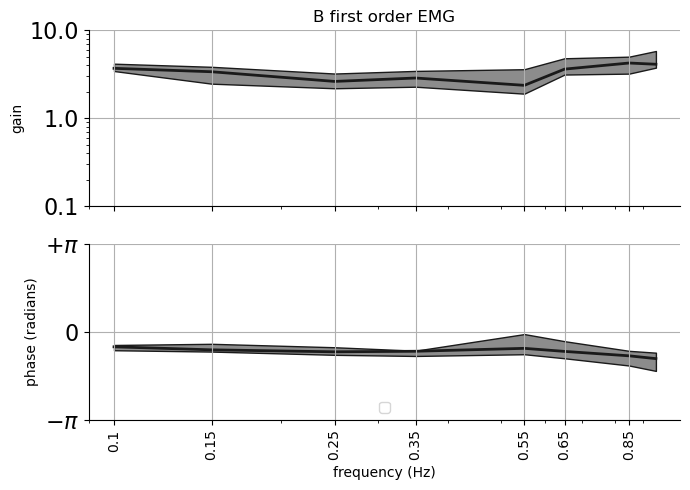

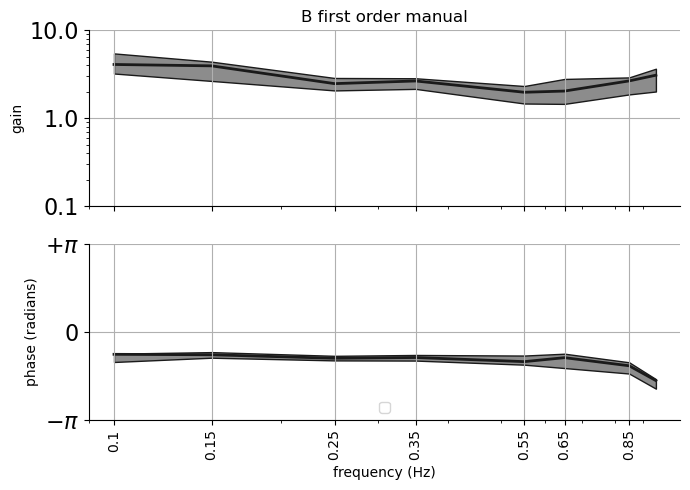

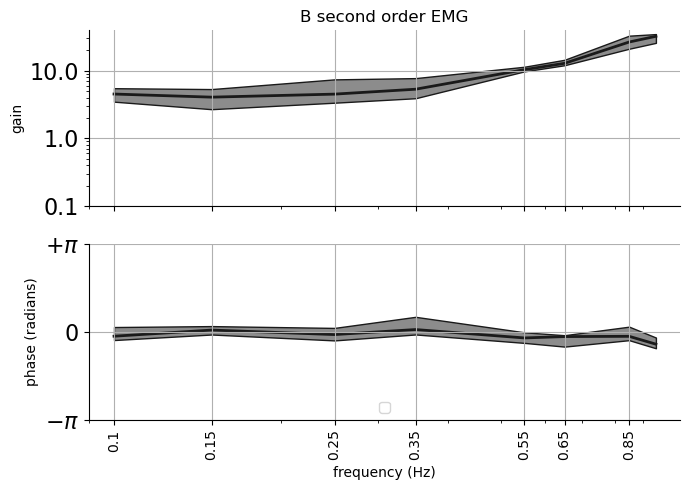

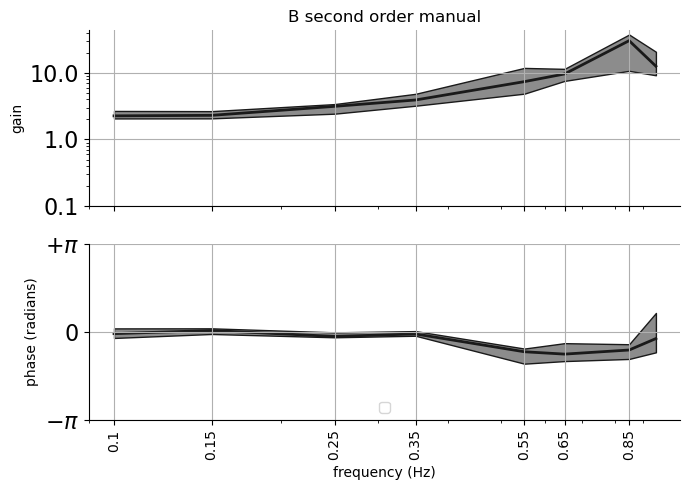

In [60]:
bode_plot(data=B_fo_emg, do_ylabels=True,title='B first order EMG')

bode_plot(data=B_fo_man, do_ylabels=True,title='B first order manual')

bode_plot(data=B_so_emg, do_ylabels=True,title='B second order EMG')

bode_plot(data=B_so_man, do_ylabels=True,title='B second order manual')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([<AxesSubplot:title={'center':'Y_OL second order manual'}, ylabel='gain'>,
       <AxesSubplot:xlabel='frequency (Hz)', ylabel='phase (radians)'>],
      dtype=object)

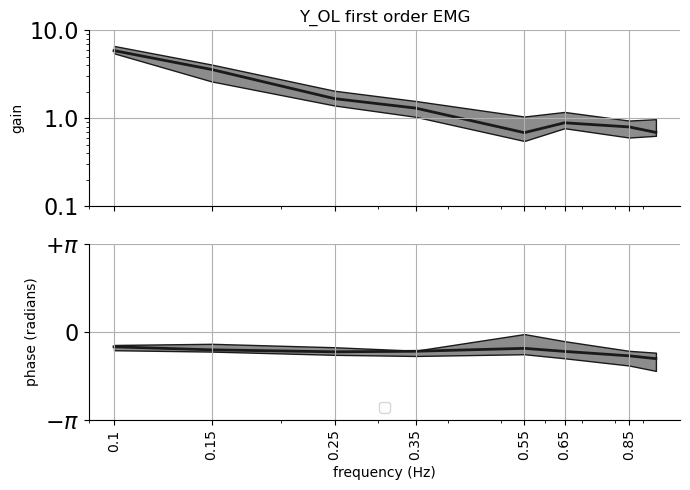

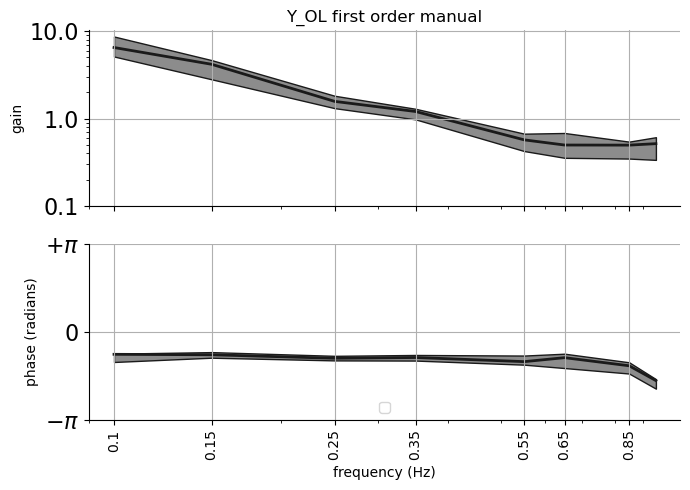

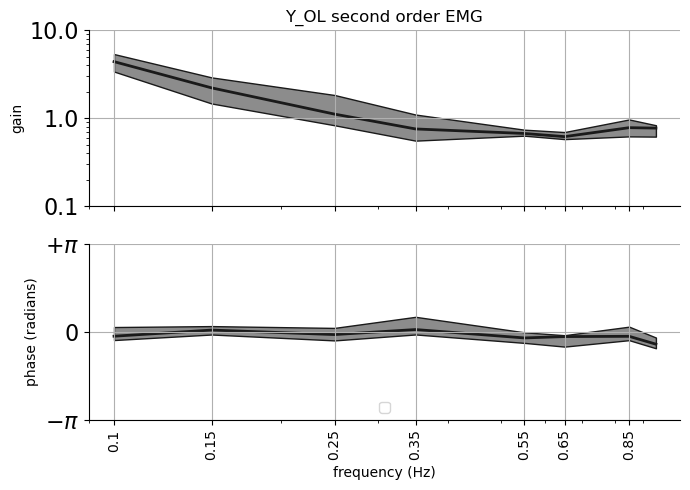

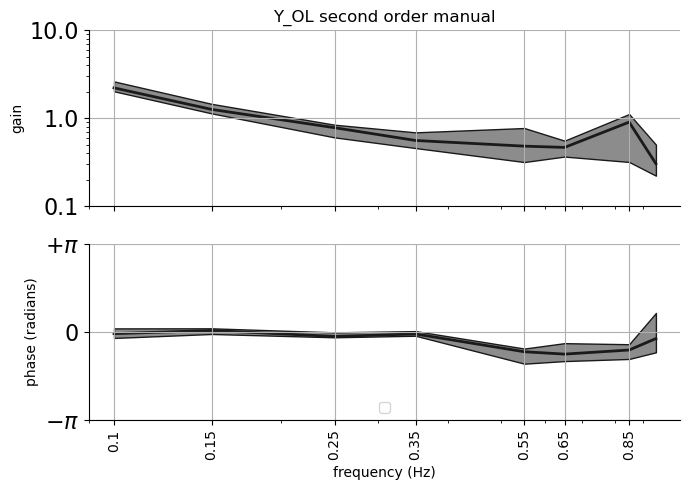

In [61]:
Mfo = lambda s: 1/s
Mso = lambda s: 1/(s*(s+1))

bode_plot(data=(B_fo_emg*Mfo(freqs*2*np.pi)), do_ylabels=True,title='Y_OL first order EMG')

bode_plot(data=(B_fo_man*Mfo(freqs*2*np.pi)), do_ylabels=True,title='Y_OL first order manual')

bode_plot(data=(B_so_emg*Mso(freqs*2*np.pi)), do_ylabels=True,title='Y_OL second order EMG')

bode_plot(data=(B_so_man*Mso(freqs*2*np.pi)), do_ylabels=True,title='Y_OL second order manual')